# Cryptocurrency 5 year data - Bitcoins, Ripples and Ethers - EDA
### Author : Prafulla Ranjan Dash

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific Pandas warnings
import warnings
warnings.filterwarnings("ignore")

C:\Users\HP\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
data_path = 'D:/USMS/UChicago/STUDIES/Autumn 2020/MSCA 31009 2 Machine Learning & Predictive Analytics/Final Project/data/'

In [3]:
# importing the data
BTC_USD = pd.read_csv(data_path+'BTC-USD.csv')
BTC_USD.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,23-11-15,324.350006,325.118011,321.290009,323.045990,323.045990,27478900
1,24-11-15,323.014008,323.058014,318.118011,320.045990,320.045990,29362600
2,25-11-15,320.045013,329.134003,316.769989,328.205994,328.205994,41666900
3,26-11-15,328.303009,366.756989,328.229004,352.683990,352.683990,106105000
4,27-11-15,351.860992,363.588989,347.869995,358.041992,358.041992,55179100


In [4]:
# importing the data
XRP_USD = pd.read_csv(data_path+'XRP-USD.csv')
XRP_USD.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-23,0.004269,0.004351,0.004237,0.004288,0.004288,314451
1,2015-11-24,0.004288,0.004288,0.004201,0.004242,0.004242,197940
2,2015-11-25,0.004242,0.004325,0.004228,0.004318,0.004318,197356
3,2015-11-26,0.004317,0.004435,0.004227,0.004291,0.004291,400520
4,2015-11-27,0.004276,0.004304,0.004229,0.004276,0.004276,199790


In [5]:
# importing the data
ETH_USD = pd.read_csv(data_path+'ETH-USD.csv')
ETH_USD.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-11-26,0.863273,0.903643,0.804360,0.884183,0.884183,947473
1,2015-11-27,0.882100,0.900051,0.860695,0.867951,0.867951,403813
2,2015-11-28,0.868102,0.929293,0.862122,0.915703,0.915703,462464
3,2015-11-29,0.914144,0.914153,0.860533,0.878614,0.878614,448358
4,2015-11-30,0.879951,0.895054,0.847696,0.873119,0.873119,784439


### Looking at the Bitcoins data

In [6]:
# checking the number of rows and columns
BTC_USD.shape

(1828, 7)

In [7]:
# checking column data types
BTC_USD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1828 non-null   object 
 1   Open       1828 non-null   float64
 2   High       1828 non-null   float64
 3   Low        1828 non-null   float64
 4   Close      1828 non-null   float64
 5   Adj Close  1828 non-null   float64
 6   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.1+ KB


In [8]:
# checking for any missing values
BTC_USD.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

From here we can see that there are **no missing values**

In [9]:
# high level statistics
BTC_USD.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03
mean,5684.372309,5826.656092,5536.218259,5694.185132,5694.185132,1.060113e+10
std,4218.353159,4341.111493,4082.685514,4227.051365,4227.051365,1.270382e+10
min,320.045013,323.058014,316.769989,320.045990,320.045990,2.747890e+07
25%,1044.180023,1061.722534,1024.822510,1045.287506,1045.287506,2.364240e+08
50%,6263.125000,6391.949951,6122.100098,6275.350098,6275.350098,5.017699e+09
75%,8935.125000,9186.858642,8776.594971,8929.680175,8929.680175,1.760751e+10
max,19475.800780,20089.000000,18974.099610,19497.400390,19497.400390,7.415677e+10


In [10]:
# correlation between the variables
corr = BTC_USD.corr()
corr.style.background_gradient(cmap='Blues').set_precision(2)

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.68
High,1.00,1.00,1.00,1.00,1.00,0.68
Low,1.00,1.00,1.00,1.00,1.00,0.68
Close,1.00,1.00,1.00,1.00,1.00,0.68
Adj Close,1.00,1.00,1.00,1.00,1.00,0.68
Volume,0.68,0.68,0.68,0.68,0.68,1.00


Here, we can see the prices are **perfectly correlated** which indicates we will need a model that is able to **capture these correlations** in order to make a good forecast or prediction. Also, the correlation between the prices and colume is fairly high.

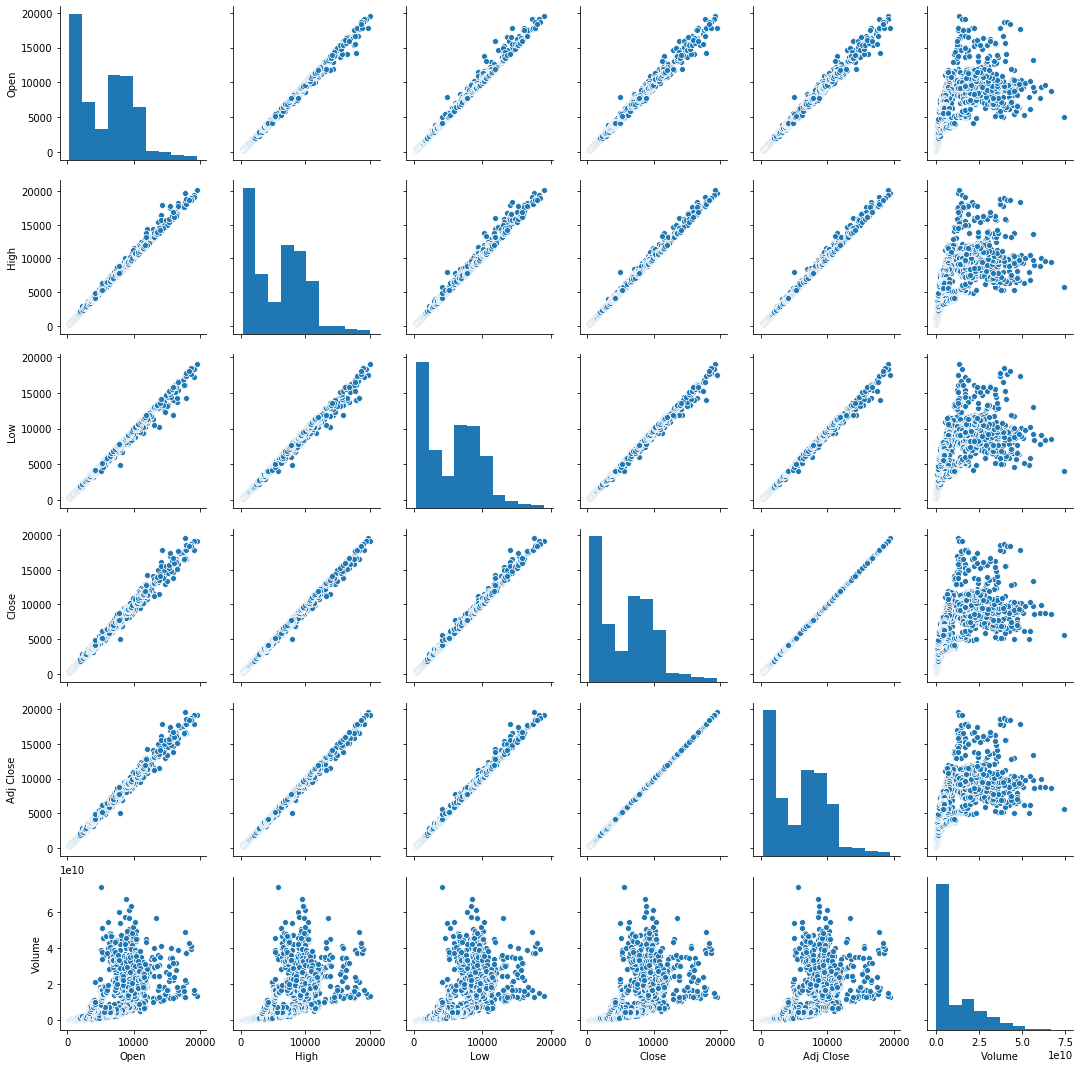

In [11]:
# viewing the pairplot between different features
sns.pairplot(BTC_USD)

The same correlations can also be observed using the pair plots above

Text(0, 0.5, 'Amount in USD')

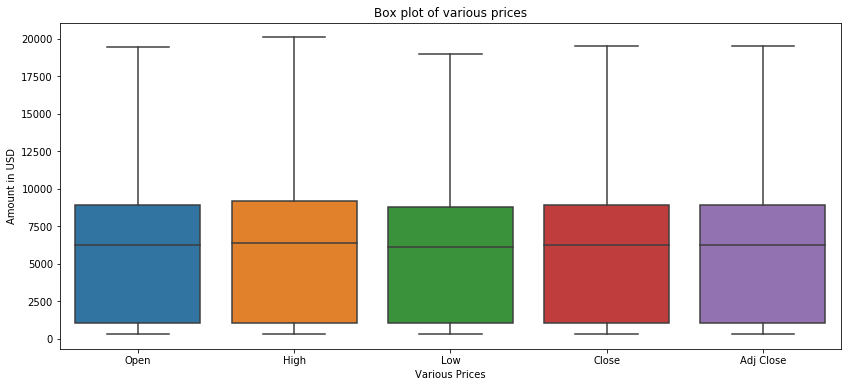

In [12]:
# checking for outliers using Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(data=BTC_USD[['Open','High','Low','Close','Adj Close']])
plt.title('Box plot of various prices')
plt.xlabel('Various Prices')
plt.ylabel('Amount in USD')

Here, we can see there are **NO outliers** for any of the prices

Text(0.5, 0, 'Volume')

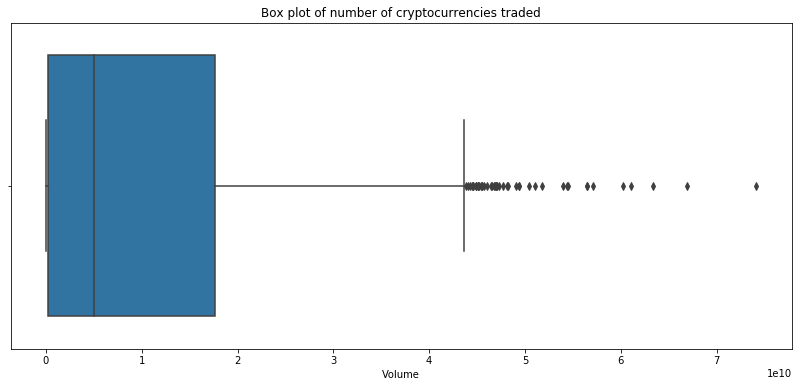

In [13]:
# checking for outliers using Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(BTC_USD['Volume'])
plt.title('Box plot of number of cryptocurrencies traded')
plt.xlabel('Volume')

There are **many outliers** for the **Volume**. That is reasonable, because the number of **Bitcoins** traded can vary over a long time of 5 years

### Looking at the Ripple data

In [14]:
# checking the number of rows and columns
XRP_USD.shape

(1829, 7)

In [15]:
# checking column data types
XRP_USD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1829 non-null   object 
 1   Open       1829 non-null   float64
 2   High       1829 non-null   float64
 3   Low        1829 non-null   float64
 4   Close      1829 non-null   float64
 5   Adj Close  1829 non-null   float64
 6   Volume     1829 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.1+ KB


In [16]:
# checking for any missing values
XRP_USD.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are **no missing values**.

In [17]:
# high level statistics
XRP_USD.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1829.000000,1829.000000,1829.000000,1829.000000,1829.000000,1.829000e+03
mean,0.278249,0.291076,0.265215,0.278637,0.278637,8.875990e+08
std,0.328240,0.356859,0.301067,0.328314,0.328314,1.510757e+09
min,0.004091,0.004189,0.004041,0.004090,0.004090,5.478100e+04
25%,0.008284,0.008628,0.008123,0.008303,0.008303,3.514540e+06
50%,0.240850,0.246417,0.233811,0.240931,0.240931,4.102260e+08
75%,0.327363,0.336500,0.318217,0.327606,0.327606,1.296590e+09
max,3.363570,3.841940,3.117340,3.377810,3.377810,3.282619e+10


In [18]:
# correlation between the variables
corr = XRP_USD.corr()
corr.style.background_gradient(cmap='Blues').set_precision(2)

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,0.99,0.99,0.99,0.99,0.35
High,0.99,1.00,0.99,1.00,1.00,0.38
Low,0.99,0.99,1.00,0.99,0.99,0.34
Close,0.99,1.00,0.99,1.00,1.00,0.37
Adj Close,0.99,1.00,0.99,1.00,1.00,0.37
Volume,0.35,0.38,0.34,0.37,0.37,1.00


Here, we can see the **prices** are **almost perfectly correlated** which indicates we will need a model that is able to **capture these correlations** in order to make a good forecast or prediction. Also, there is low correlation between the prices and volume.

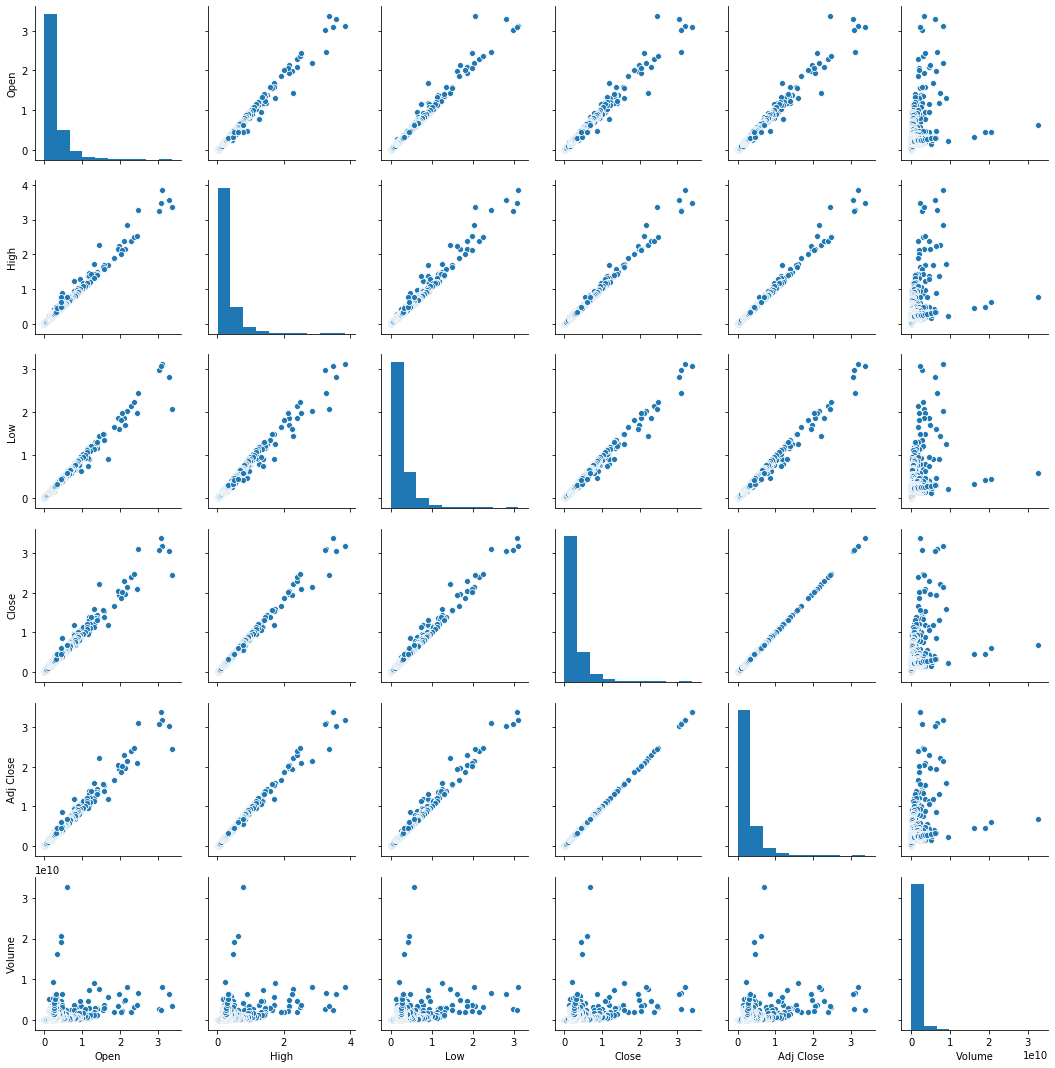

In [19]:
# viewing the pairplot between different features
sns.pairplot(XRP_USD)

The same correlations can also be observed using the pair plots above

Text(0, 0.5, 'Amount in USD')

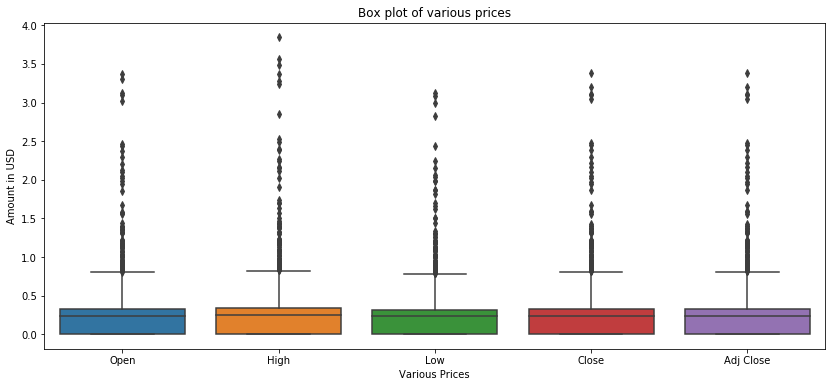

In [20]:
# checking for outliers using Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(data=XRP_USD[['Open','High','Low','Close','Adj Close']])
plt.title('Box plot of various prices')
plt.xlabel('Various Prices')
plt.ylabel('Amount in USD')

Here, we do see **many outliers** for all the prices.

Text(0.5, 0, 'Volume')

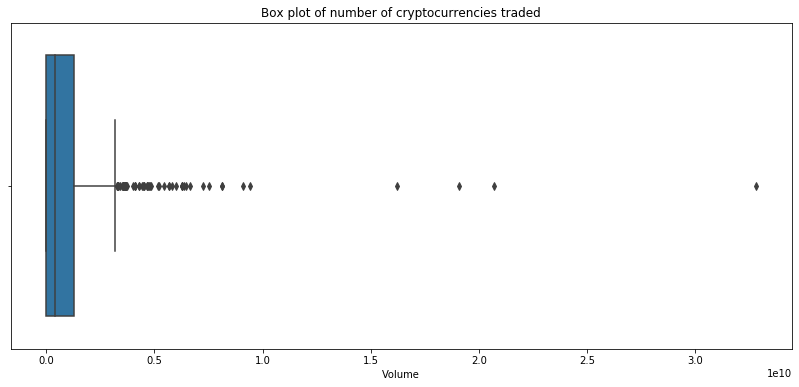

In [21]:
# checking for outliers using Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(XRP_USD['Volume'])
plt.title('Box plot of number of cryptocurrencies traded')
plt.xlabel('Volume')

There are **many outliers** for the **Volume**. That is reasonable, because the number of **Ripples** traded can vary over a long time of 5 years

### Looking at the Ether data

In [22]:
# checking the number of rows and columns
ETH_USD.shape

(1828, 7)

In [23]:
# checking column data types
ETH_USD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1828 entries, 0 to 1827
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1828 non-null   object 
 1   Open       1828 non-null   float64
 2   High       1828 non-null   float64
 3   Low        1828 non-null   float64
 4   Close      1828 non-null   float64
 5   Adj Close  1828 non-null   float64
 6   Volume     1828 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 100.1+ KB


In [24]:
# checking for any missing values
ETH_USD.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

There are **no missing values**.

In [25]:
# high level statistics
ETH_USD.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1828.000000,1828.000000,1828.000000,1828.000000,1828.000000,1.828000e+03
mean,229.054996,237.063484,220.241166,229.307553,229.307553,4.537468e+09
std,227.804393,237.709980,216.141869,227.767123,227.767123,5.731916e+09
min,0.795590,0.823645,0.770488,0.792167,0.792167,1.645650e+05
25%,15.828475,17.575924,15.450000,16.442775,16.442775,5.397375e+07
50%,186.183739,191.184883,181.604103,186.481468,186.481468,1.876849e+09
75%,305.939247,316.224090,295.143501,306.788009,306.788009,7.473294e+09
max,1397.479980,1432.880005,1290.599976,1396.420044,1396.420044,3.142113e+10


In [26]:
# correlation between the variables
corr = ETH_USD.corr()
corr.style.background_gradient(cmap='Blues').set_precision(2)

,Open,High,Low,Close,Adj Close,Volume
Open,1.00,1.00,1.00,1.00,1.00,0.20
High,1.00,1.00,1.00,1.00,1.00,0.20
Low,1.00,1.00,1.00,1.00,1.00,0.20
Close,1.00,1.00,1.00,1.00,1.00,0.20
Adj Close,1.00,1.00,1.00,1.00,1.00,0.20
Volume,0.20,0.20,0.20,0.20,0.20,1.00


Here, we can see the prices are **perfectly correlated** which indicates we will need a model that is able to **capture these correlations** in order to make a good forecast or prediction. The volume and prices are very less correlated.

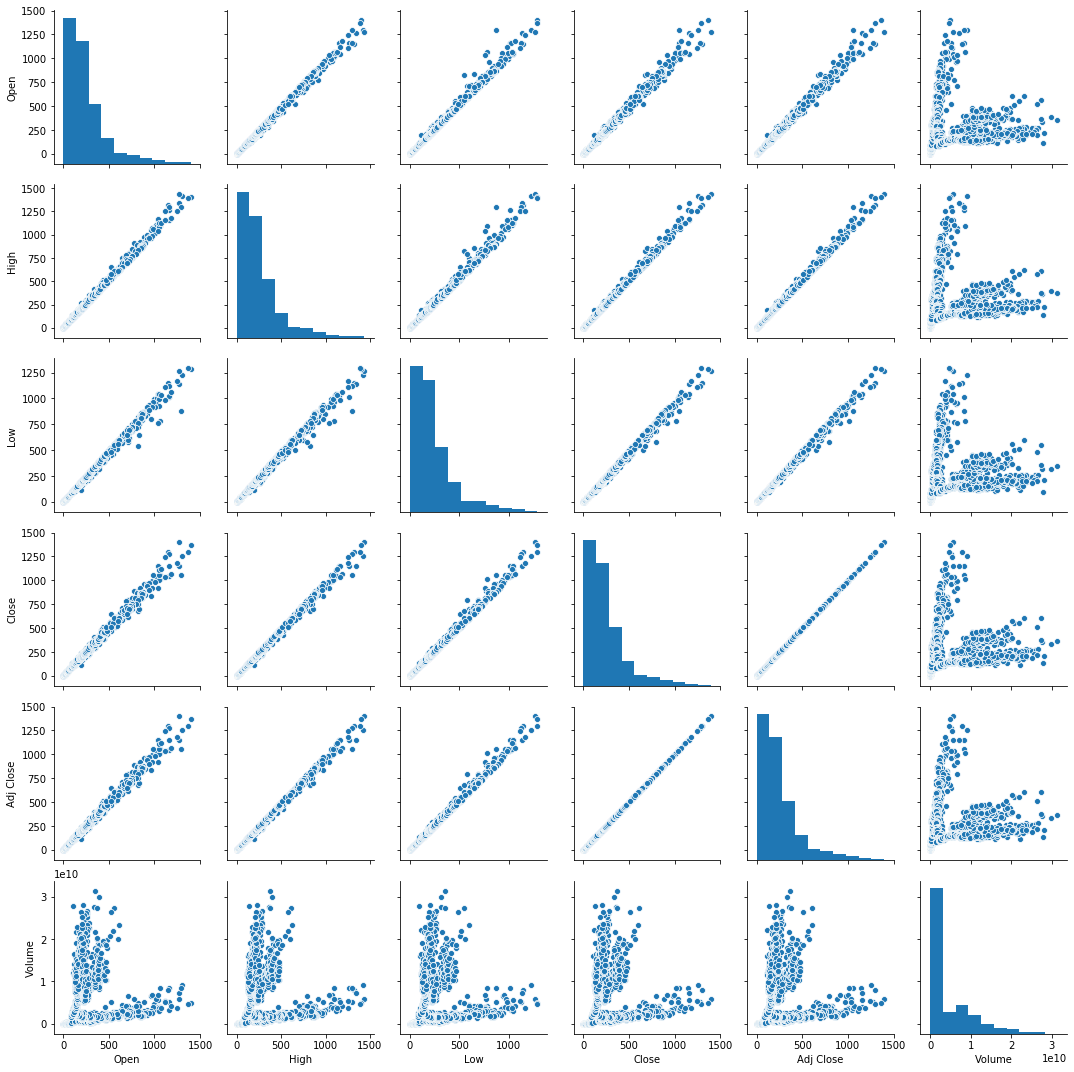

In [27]:
# viewing the pairplot between different features
sns.pairplot(ETH_USD)

The same correlations can also be observed using the pair plots above

Text(0, 0.5, 'Amount in USD')

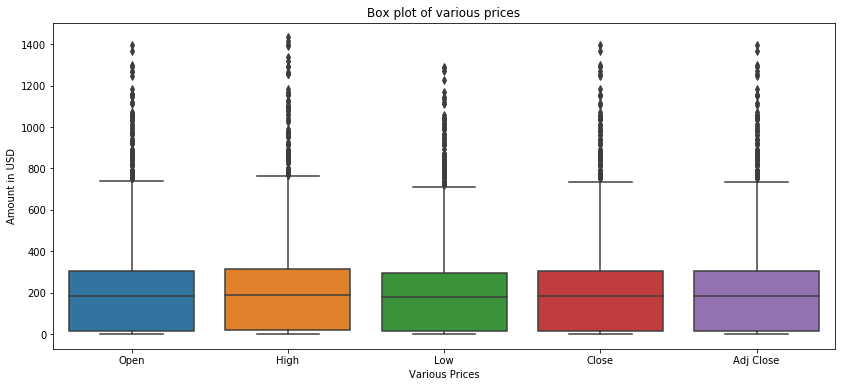

In [28]:
# checking for outliers using Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(data=ETH_USD[['Open','High','Low','Close','Adj Close']])
plt.title('Box plot of various prices')
plt.xlabel('Various Prices')
plt.ylabel('Amount in USD')

Here, we do see **many outliers** for all the prices.

Text(0.5, 0, 'Volume')

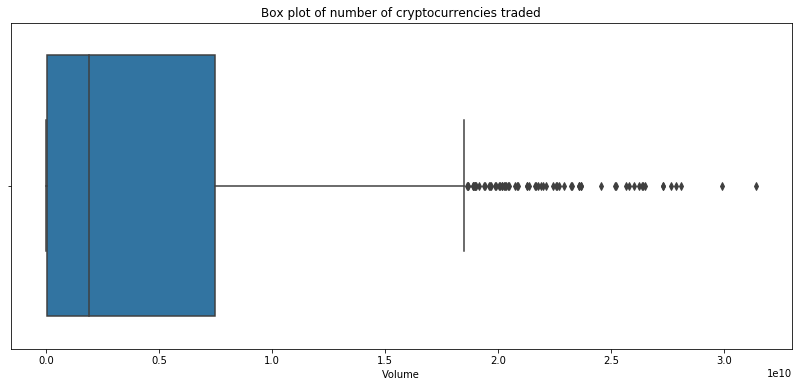

In [29]:
# checking for outliers using Boxplots
plt.figure(figsize=(14,6))
sns.boxplot(ETH_USD['Volume'])
plt.title('Box plot of number of cryptocurrencies traded')
plt.xlabel('Volume')

There are **many outliers** for the **Volume**. That is reasonable, because the number of **Ethers** traded can vary over a long time of 5 years

So, overall we can see that the **prices for Bitcoins have been fairly steady over the last 5 years**, in comparison to those of Ripples and Ethers. This is an indication that this **bitcoins** might be a safe option if we are looking at some **steady returns** for our investments.